### 1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need.

In [41]:
import pandas as pd

bottle = pd.read_csv('C:/Users/balazs.varga/Documents/BALAZS/USE/REPOS/CalCOFI/bottle.csv', low_memory = False)
cast = pd.read_csv('C:/Users/balazs.varga/Documents/BALAZS/USE/REPOS/CalCOFI/cast.csv', low_memory = False)

In [42]:
bottle.head(1)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.5,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [44]:
cast.head(1)

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [45]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [46]:
print('bottle data:')
print('............')
print(bottle.isna().sum())
print('----------------------------------------')
print('cast data:')
print('...............')
print(cast.isna().sum())

bottle data:
............
Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64
----------------------------------------
cast data:
...............
Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64


In [47]:
columns = bottle.columns

for column in columns:
    print(column + ':')
    print('.................')
    print(bottle[column].value_counts())
    print('----------------------------------------')

Cst_Cnt:
.................
14467    80
14083    79
13957    78
14082    78
12467    76
         ..
24167     1
24168     1
24169     1
24170     1
22983     1
Name: Cst_Cnt, Length: 34404, dtype: int64
----------------------------------------
Btl_Cnt:
.................
1         1
576594    1
576570    1
576571    1
576572    1
         ..
288292    1
288293    1
288294    1
288295    1
864863    1
Name: Btl_Cnt, Length: 864863, dtype: int64
----------------------------------------
Sta_ID:
.................
090.0 045.0    10043
090.0 070.0    10039
090.0 037.0     9771
090.0 060.0     9521
080.0 060.0     9393
               ...  
102.0 035.0        1
101.0 040.0        1
101.0 035.0        1
106.0 030.5        1
101.0 045.0        1
Name: Sta_ID, Length: 2634, dtype: int64
----------------------------------------
Depth_ID:
.................
20-16045S-MX-110-2018-06330900-0010A-3    2
20-16045S-MX-110-1421-06670900-0061A-3    2
20-16045S-MX-110-2018-06330900-0025A-3    2
20-16045S-MX-1

146.9    534
146.0    530
153.9    527
146.5    525
150.5    513
        ... 
522.6      1
535.5      1
39.9       1
38.8       1
546.2      1
Name: R_SVA, Length: 5254, dtype: int64
----------------------------------------
R_DYNHT:
.................
0.000    32523
0.030    25549
0.060    15315
0.090    13122
0.070    12446
         ...  
1.545        1
1.478        1
1.408        1
1.258        1
2.241        1
Name: R_DYNHT, Length: 1848, dtype: int64
----------------------------------------
R_O2:
.................
5.80    3023
5.76    3007
5.84    2935
5.77    2906
5.79    2904
        ... 
8.41       1
7.94       1
8.16       1
8.09       1
8.66       1
Name: R_O2, Length: 871, dtype: int64
----------------------------------------
R_O2Sat:
.................
102.4    2890
102.5    2816
102.2    2813
102.6    2793
102.3    2792
         ... 
137.9       1
133.7       1
138.5       1
162.4       1
134.3       1
Name: R_O2Sat, Length: 1453, dtype: int64
--------------------------------

We need to perfrom two preprocessing steps: remove columns that are irrevelant for the correlation matrix and fill nan values in the rest. There are a number of columns that seem to be irrevelant (like bottle ID, cast count, bottle count, station ID etc.), and also some columns that have so many missing values (more than 60%) that estimation or replacement seems to be impractical. Technically the R values are not necessary neither, but leaving them does not cause harm. Will create bottle_dropped and cast_dropped dataframes:

In [83]:
bottle_dropped = bottle[[ 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'RecInd', 'T_prec', 'S_prec', 'P_qual', 'Chlqua', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q',
       'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_PRES']]

from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean') # does it by columns
bottle_dropped_trans = pd.DataFrame(imp.fit_transform(bottle_dropped))
bottle_dropped_trans.columns = bottle_dropped.columns
bottle_dropped_trans.index = bottle_dropped.index



In [84]:
bottle_dropped_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 40 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       864863 non-null  float64
 1   T_degC       864863 non-null  float64
 2   Salnty       864863 non-null  float64
 3   O2ml_L       864863 non-null  float64
 4   STheta       864863 non-null  float64
 5   O2Sat        864863 non-null  float64
 6   Oxy_µmol/Kg  864863 non-null  float64
 7   RecInd       864863 non-null  float64
 8   T_prec       864863 non-null  float64
 9   S_prec       864863 non-null  float64
 10  P_qual       864863 non-null  float64
 11  Chlqua       864863 non-null  float64
 12  Phaqua       864863 non-null  float64
 13  PO4uM        864863 non-null  float64
 14  PO4q         864863 non-null  float64
 15  SiO3uM       864863 non-null  float64
 16  SiO3qu       864863 non-null  float64
 17  NO2uM        864863 non-null  float64
 18  NO2q         864863 non-

In [93]:
cast_dropped = cast[['Quarter', 'Distance', 'Lat_Dec', 'Lat_Deg', 'Lat_Min', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D','Order_Occ','Event_Num', 'Cruz_Leg', 'IntChl',
       'IntC14', 'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility']]

cast_dropped_trans = pd.DataFrame(imp.fit_transform(cast_dropped))
cast_dropped_trans.columns = cast_dropped.columns
cast_dropped_trans.index = cast_dropped.index

In [94]:
cast_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quarter     34404 non-null  int64  
 1   Distance    19714 non-null  float64
 2   Lat_Dec     34404 non-null  float64
 3   Lat_Deg     34404 non-null  int64  
 4   Lat_Min     34404 non-null  float64
 5   Lon_Dec     34404 non-null  float64
 6   Lon_Deg     34404 non-null  int64  
 7   Lon_Min     34404 non-null  float64
 8   Rpt_Line    34404 non-null  float64
 9   St_Line     34404 non-null  float64
 10  Ac_Line     34404 non-null  float64
 11  Rpt_Sta     34404 non-null  float64
 12  St_Station  34404 non-null  float64
 13  Ac_Sta      34404 non-null  float64
 14  Bottom_D    32123 non-null  float64
 15  Order_Occ   9954 non-null   float64
 16  Event_Num   34401 non-null  float64
 17  Cruz_Leg    1464 non-null   float64
 18  IntChl      12203 non-null  float64
 19  IntC14      2129 non-null

### 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature.

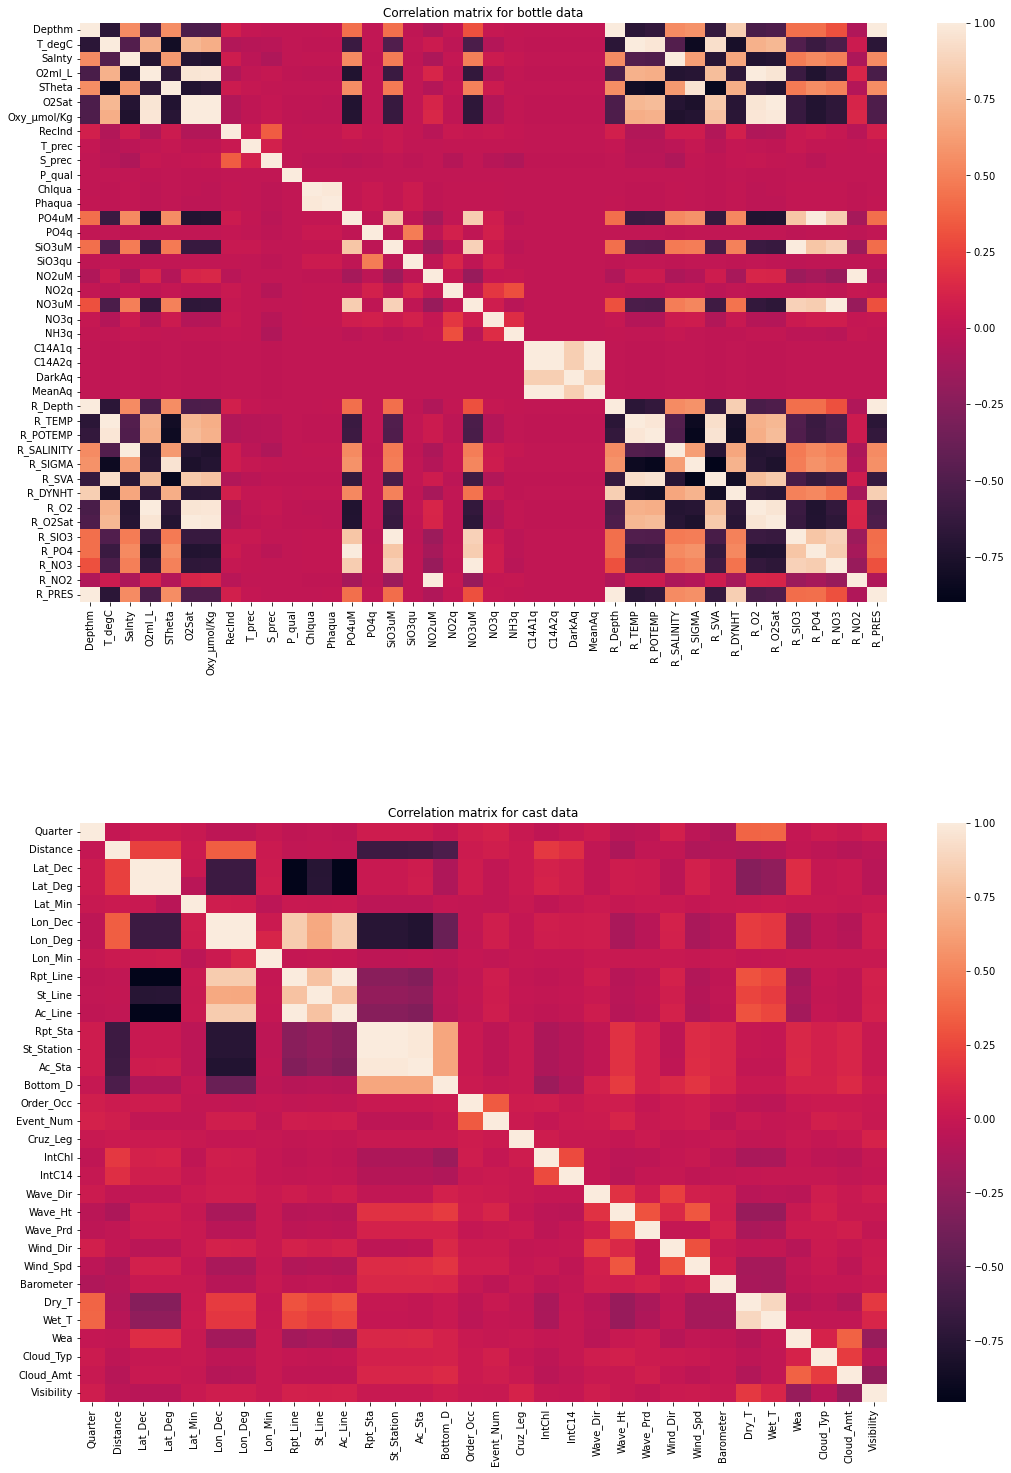

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

bottle_corr = bottle_dropped_trans.corr()
cast_corr = cast_dropped_trans.corr()

fig = plt.figure(figsize = (20, 25))
ax0 = fig.add_subplot(2, 1, 1) 
ax1 = fig.add_subplot(2, 1, 2)

fig.tight_layout(pad = 20.0)

sns.heatmap(bottle_corr, ax = ax0)
sns.heatmap(cast_corr, ax = ax1)

ax0.set_title('Correlation matrix for bottle data')
ax1.set_title('Correlation matrix for cast data')

plt.show()

Generally speaking most features do not show a strong correlation, there are a few exemptions, though, notably oxygen levels, salinity, temperature and depth show correlations (be it positive or negative) with other features.

Strong negative correlations with water temperature: depth, salinity, Stheta, PO4, SO3, NO3 miclomolar concentrations, 

Strong positive correlations with water temperature: oxygen content (well, this should be suspicious as gas solubility is higher at lower temperatures).

### 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean') # does it by columns

X = np.array(bottle['Salnty']).reshape(-1, 1)
y = np.array(bottle['T_degC']).reshape(-1, 1)

imp.fit(X)
X_trans = imp.transform(X)

imp.fit(y)
y_trans = imp.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size = 0.3, random_state = 42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

It does not quite look like linear regression is a good model for this data (see point n. 5)

### 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2 = reg.score(X_test, y_test)
r2_ = r2_score(y_test, y_pred) # alternatively, shall give the same as above
mse = mean_squared_error(y_test, y_pred)

print("Linear regression R squared: {}".format(r2))
print("Linear regression R squared: {}".format(r2_))
print("Linear regression MSE: {}".format(mse))

Linear regression R squared: 0.2398626139926211
Linear regression R squared: 0.2398626139926211
Linear regression MSE: 13.51146392612505


R squared: R-squared represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model. In this respect it differs from correlation that explains the strength of the relationship between an independent and dependent variable.

MSE: measures the average of the squares of the errors, it is also one of the terms appearing in the calculation of R squared

### 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

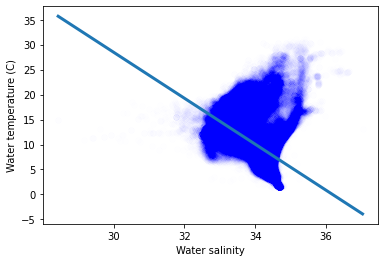

In [72]:
prediction_space = np.linspace(min(bottle['Salnty']), max(bottle['Salnty'])).reshape(-1, 1)

_= plt.scatter(bottle['Salnty'], bottle['T_degC'], color = 'blue', alpha = 0.003)
_= plt.plot(prediction_space, reg.predict(prediction_space), linewidth = 3)
_= plt.ylabel('Water temperature (C)')
_= plt.xlabel('Water salinity')
plt.show()

### 6.	Do some research on polynomial regression. Describe what it is any how it works in markdown.

In polynomial regression we take into account the possibility that the relationship between the data and target variable is not linear, but might depend on the linear combination of some powers of the data. If we choose degree n, all powers of the independent variables from 0 to n are incorporated and then a linear regression is performed on the new set of data. If for example we have two independent variables, x and z, all possible combinations of the form $$ x^j*z^{k-j} $$ will be incorporated where k has a value between 0 and n, while j ranges between 0 and k. Thus the items in the subsequent linear regression grow exponentially by the degree, which makes the process computationally vey demanding.

### 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [63]:
# degrees = 2
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

trans_2 = PolynomialFeatures(degree = 2)
model = LinearRegression()
steps_2 = [('t', trans_2), ('m', model)] # includes the previous transformation
pipeline_2 = Pipeline(steps_2)

pipeline_2.fit(X_train, y_train)
y_pred = pipeline_2.predict(X_test)
pipeline_2.score(X_test, y_test)


0.25425457434335974

The score shows a marginal improvement over the linear model

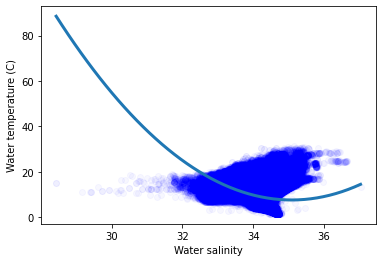

In [64]:
_= plt.scatter(bottle['Salnty'], bottle['T_degC'], color = 'blue', alpha = 0.03)
_= plt.plot(prediction_space, pipeline_2.predict(prediction_space), linewidth = 3)
_= plt.ylabel('Water temperature (C)')
_= plt.xlabel('Water salinity')
plt.show()

In [65]:
# with degree = 3

trans_3 = PolynomialFeatures(degree = 3)
model = LinearRegression()
steps_3 = [('t', trans_3), ('m', model)] # includes the previous transformation
pipeline_3 = Pipeline(steps)

pipeline_3.fit(X_train, y_train)
y_pred = pipeline_3.predict(X_test)
pipeline_3.score(X_test, y_test)

0.35781603659350614

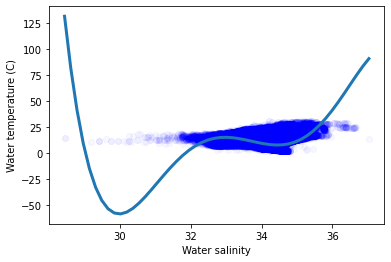

In [66]:
_= plt.scatter(bottle['Salnty'], bottle['T_degC'], color = 'blue', alpha = 0.03)
_= plt.plot(prediction_space, pipeline_3.predict(prediction_space), linewidth = 3)
_= plt.ylabel('Water temperature (C)')
_= plt.xlabel('Water salinity')
plt.show()

In [67]:
# with degree = 4

trans_4 = PolynomialFeatures(degree = 4)
model = LinearRegression()
steps_4 = [('t', trans_4), ('m', model)] # includes the previous transformation
pipeline_4 = Pipeline(steps_4)

pipeline_4.fit(X_train, y_train)
y_pred = pipeline_4.predict(X_test)
pipeline_4.score(X_test, y_test)

0.3440221119007508

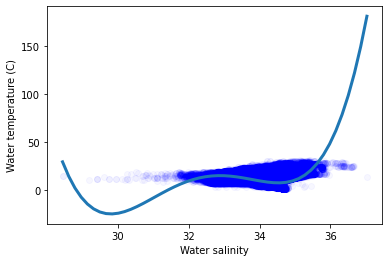

In [74]:
_= plt.scatter(bottle['Salnty'], bottle['T_degC'], color = 'blue', alpha = 0.03)
_= plt.plot(prediction_space, pipeline_4.predict(prediction_space), linewidth = 3)
_= plt.ylabel('Water temperature (C)')
_= plt.xlabel('Water salinity')
plt.show()

Also tried with degrees 5 and 6, but the increment of score is marginal (while the increment in computing power necessary is very much significant)

### 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

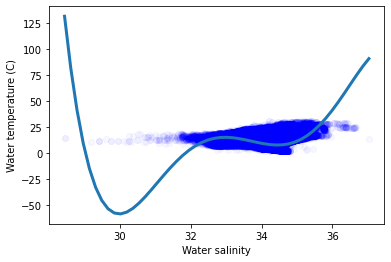

In [73]:
# the best one proved to be with degree = 3

_= plt.scatter(bottle['Salnty'], bottle['T_degC'], color = 'blue', alpha = 0.03)
_= plt.plot(prediction_space, pipeline_3.predict(prediction_space), linewidth = 3)
_= plt.ylabel('Water temperature (C)')
_= plt.xlabel('Water salinity')
plt.show()

The polynomials clearly capture more of the variation in the data, expecially in the range where this data is most dense. As expected it fails at the edges.

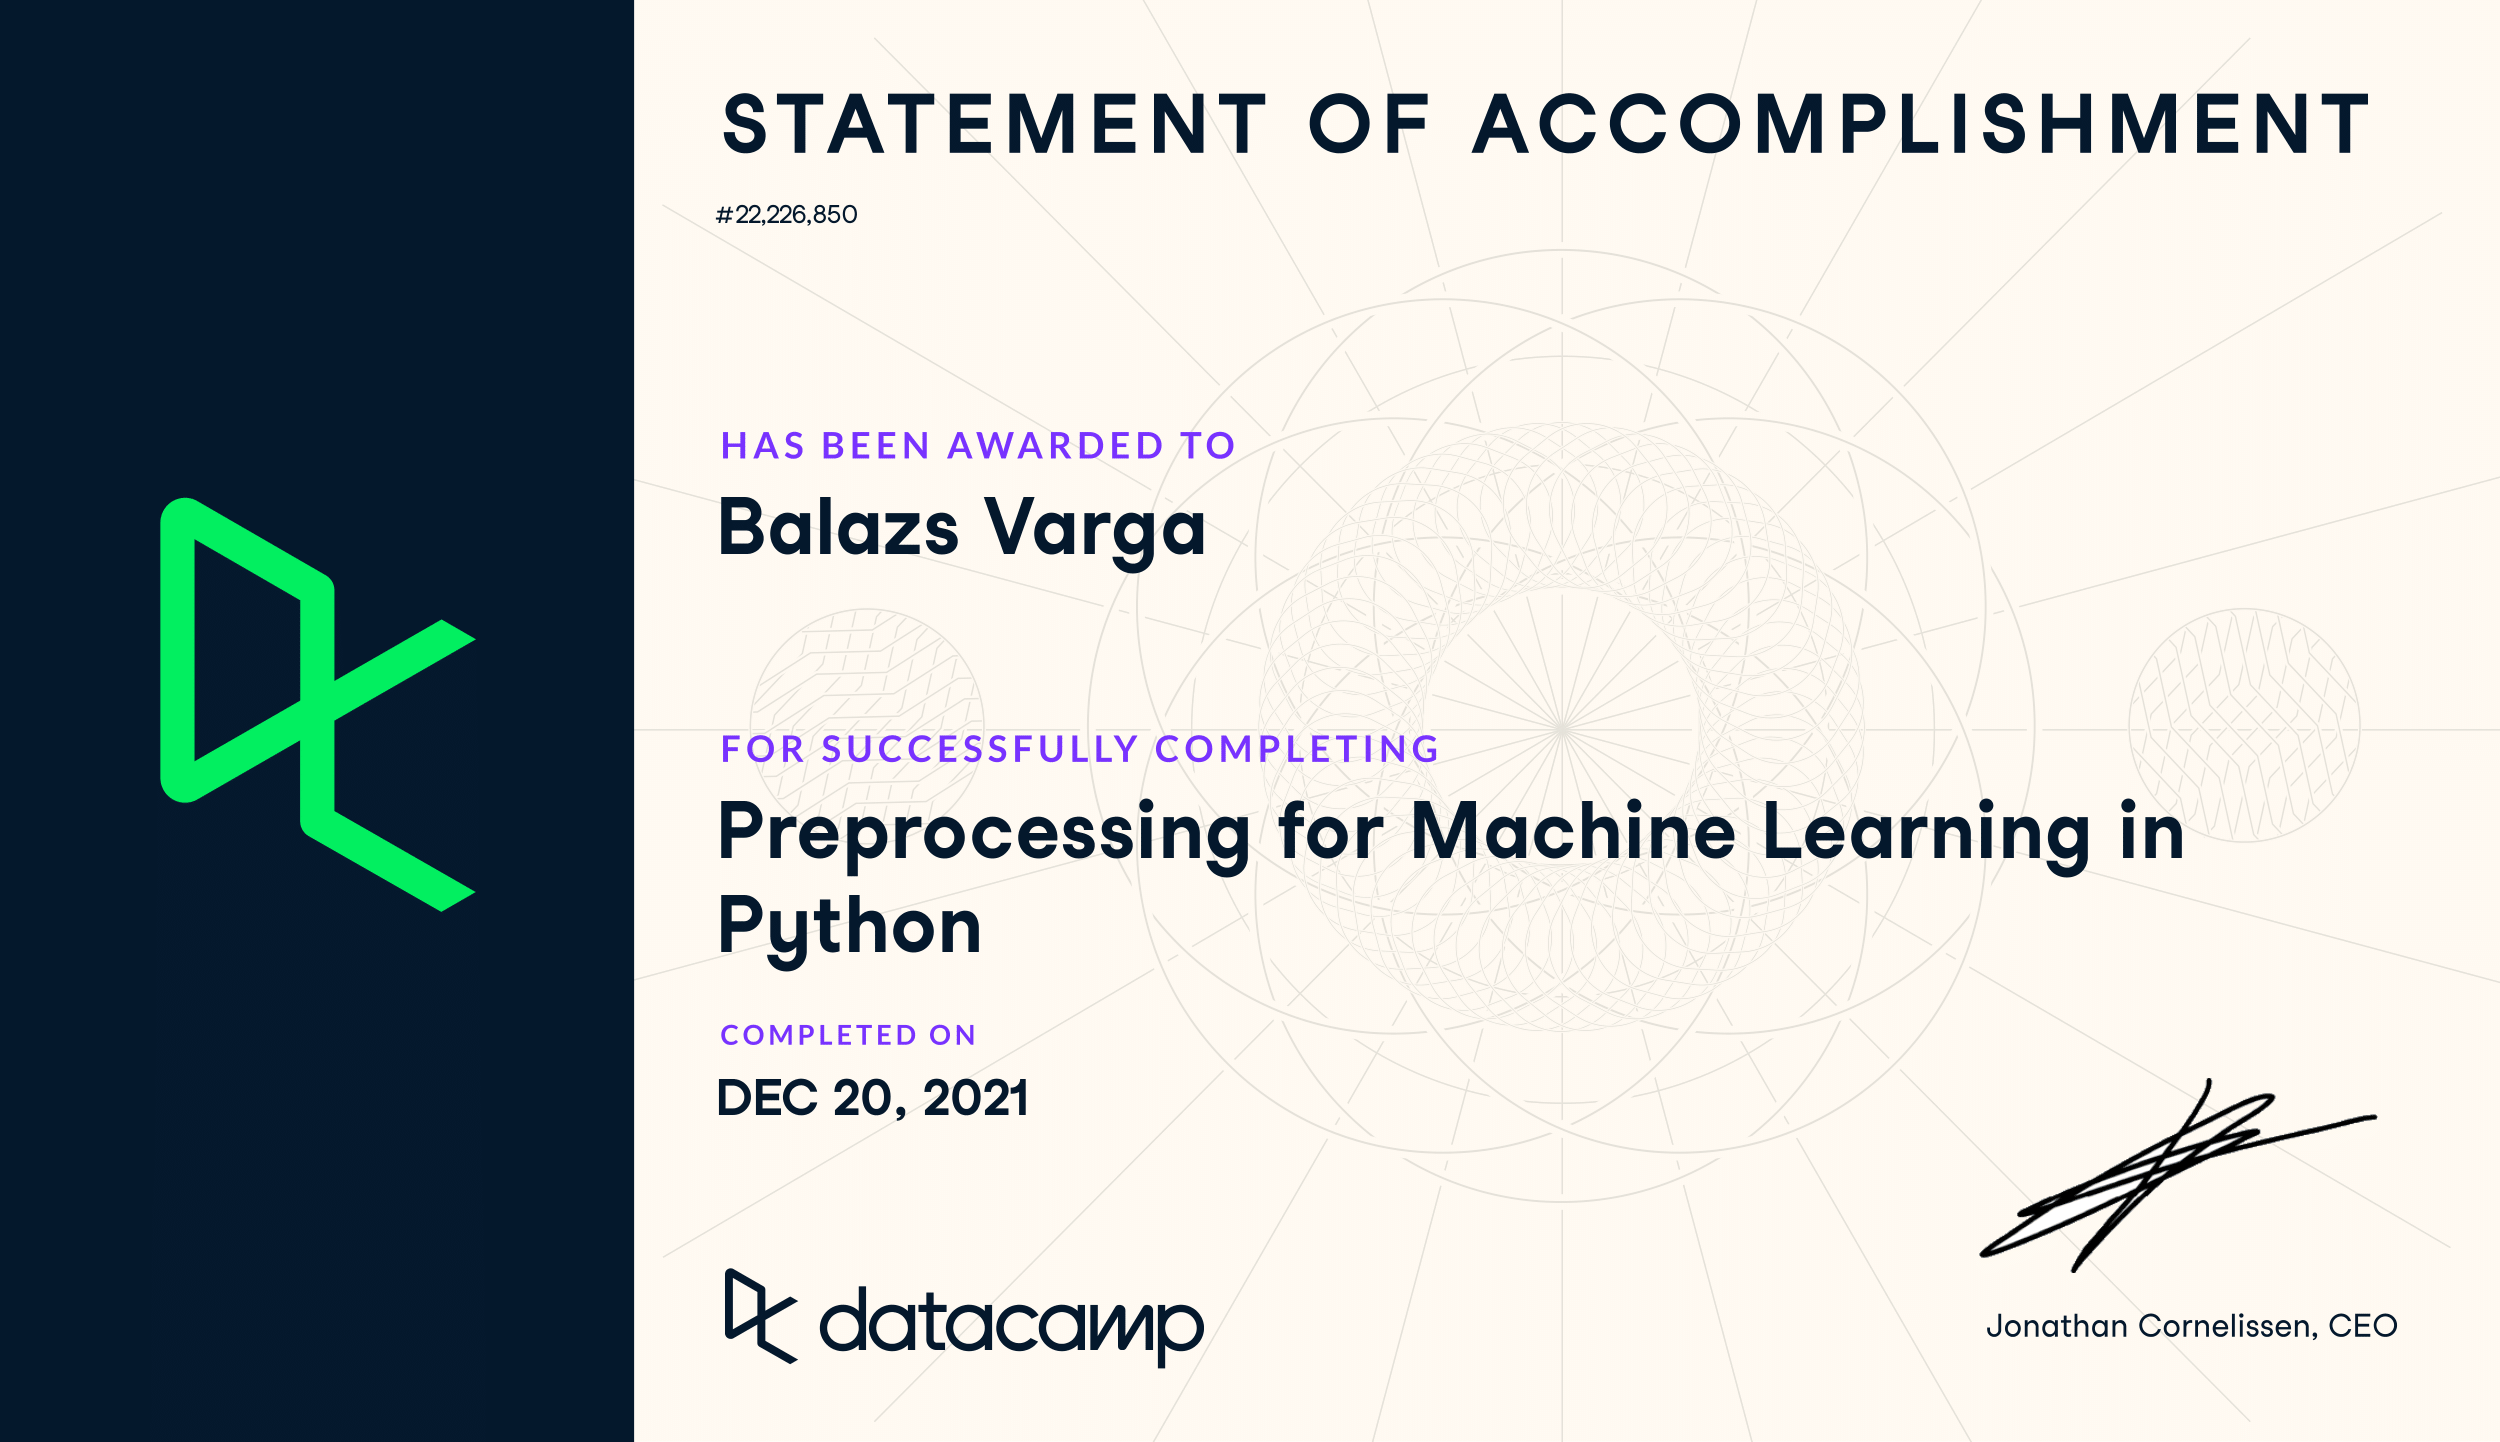

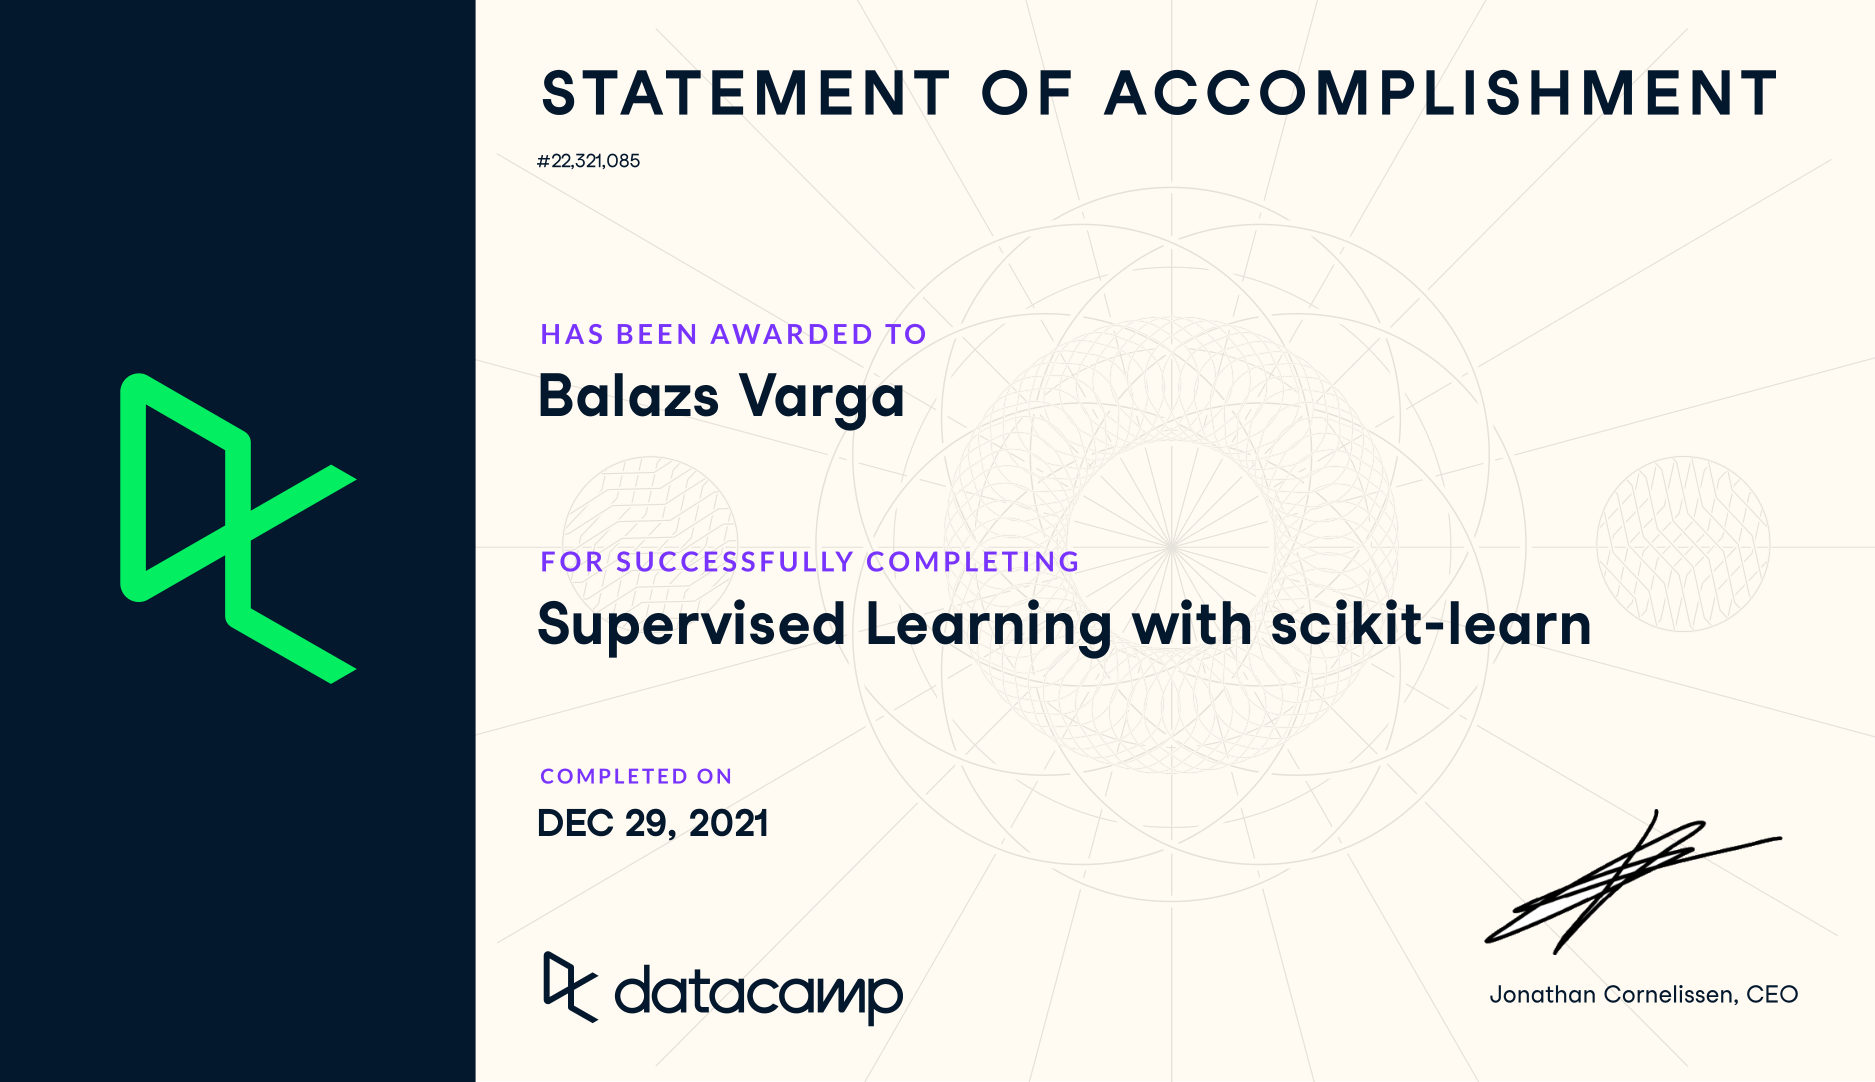